In [ ]:
#week 2 lab with milan robertson
#amelia konomos for physics 18L
#data analysis in python

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import odr
from scipy.optimize import curve_fit
from scipy.odr import *
import random
import pandas as pd
from numpy import array, exp

Text(0.5, 1.0, 'experimental data')

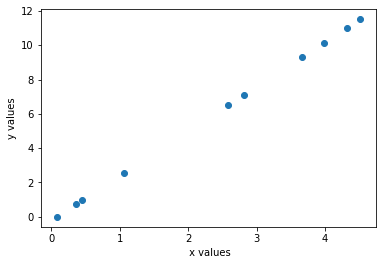

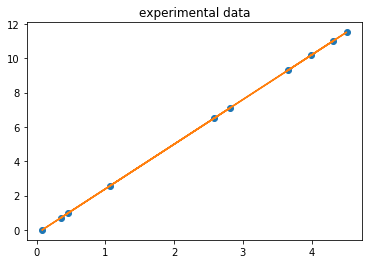

In [409]:
#2.2.5
#generate an experiment via 2.1 with n,m,s,x
noise = np.random.normal(loc = 0, scale = 0.2)
m = 2.6
#x is from 0 to 10
x = np.random.uniform(0, 5, 10)
y = m*x + noise 

#plot original data
plt.figure()
plt.scatter(x, y, label = 'My equation data')
plt.xlabel(' x values')
plt.ylabel('y values')

#fit experimental data for best fit slope

np.random.uniform(x, y)
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('best fit line')
plt.title('experimental data')



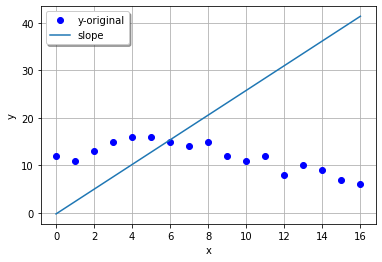

In [431]:
#fit the linear function
y = array([12,11,13,15,16,16,15,14,15,12,11,12,8,10,9,7,6]) 
x = array(range(len(y)))

def func1(x, m, b):
    return m*x + b

params, covs = curve_fit(func1, x, y)
 
params, _ = curve_fit(func1, x, y)
yfit1 = m*x + b

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="slope")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


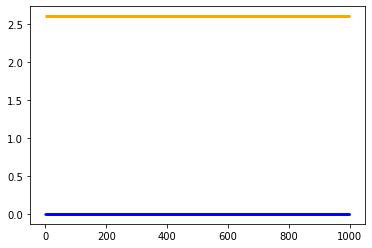

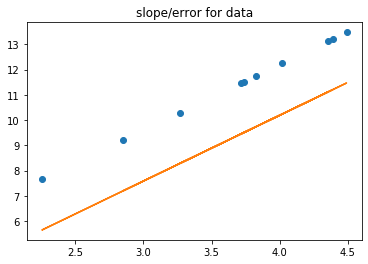

In [452]:
#next
def linear(A, x):
    return A[0]*x

popts = np.zeros(1000)
perrs = np.zeros(1000)
n_sigs = np.zeros(1000)


#repeat 1000 times
for i in range(1000):
    noise = np.random.normal(loc = 0.0, scale = 0.8, size = None)
    m = 2.6
    x = np.random.uniform(0,5,10)
    y = m*x + noise


    lin_model = sp.odr.Model(linear)
    data1 = sp.odr.RealData(x,y)

      
    lin_odr = sp.odr.ODR(data1, lin_model, beta0=[0.5,10])
    lin_out = lin_odr.run()

    
    popt_lin = lin_out.beta
    perr_lin = np.sqrt(np.diag(lin_out.cov_beta))
    fit = linear(popt_lin, x)
    
    popt_tot = popt_lin
    perr_tot = perr_lin
    
    popts[i] = popts[i]
    perrs[i] = perrs[i]
    
        
    n_sigma = ((popt_lin)-m) / (perr_lin)
    n_sigs[i] = n_sigs[i]
    
#plot the slope values with uncertainties
x1 = range(1000)
plt.errorbar(x1, popts, yerr=perrs, markersize = 1.25, fmt = 'o', color = 'blue', label='slopes ')
plt.hlines(m, 0, 1000, color = 'orange', zorder=1000, linewidth = 3, label = 'slope')
plt.figure()
plt.title('slope/error for data')
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)



In [443]:
#next

Text(0.5, 1.0, 'normalized histogram')

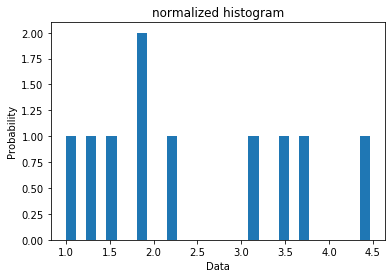

In [459]:
#normalized histogram

x = np.random.uniform(0,5,10)
y = np.random.normal(size=1000)
plt.hist(x, density=False, bins=30)  
plt.ylabel('Probability')
plt.xlabel('Data');
plt.title('normalized histogram')

Text(0, 0.5, 'y data')

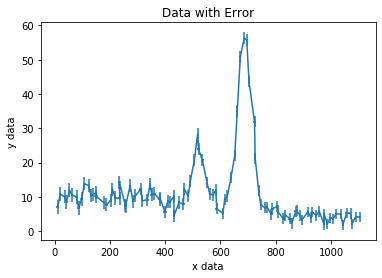

In [322]:
#2.3.2
#read in my spectrum data
path = '/Users/amelia/Desktop/spectrum.txt'
data = pd.read_csv(path ,encoding= 'latin1', delimiter = '\t')
#separate x and y into 4 arrays
x_num = data['x'].str.split('±', expand=True)
x_num = data_x.rename(columns = {0: 'x', 1: 'x_error'})

#y 
y_num = data['y'].str.split('±', expand = True)
y_num = data_y.rename(columns = {0: 'y', 1:'y_error'})

#combine data
df = pd.concat([data_x, data_y], axis = 1)
df = df.astype(float)

#plot data with error bars
fig = plt.figure()
plt.errorbar(df['x'], df['y'], yerr = df['y_error'], xerr = df['x_error'])
plt.title('Data with Error')
plt.xlabel('x data')
plt.ylabel('y data')


In [328]:
#moving on to next step
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<ErrorbarContainer object of 3 artists>

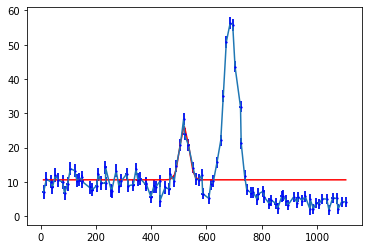

In [376]:
#write gaussian function
#Define the Gaussian function
def gauss(x, amp1, xcen, sigma, bkgrd):
    return amp1*np.exp((-0.5)*(((x-xcen)/sigma)**2)) + bkgrd

x_data = df['x']
y_data = df['y']
xerr = df['x_error']
yerr = df['y_error']

#optimize curve
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(gauss, x_data, y_data, p0=[35, 500, 60, 15])

#now plot the gaussian
plt.figure()
plt.plot(x_data, gauss(x_data,*popt_gauss), 'r-', label='fit')
plt.errorbar(df['x'], df['y'], yerr = df['y_error'], xerr = df['x_error'])
plt.errorbar(x_data, y_data, xerr=xerr, yerr=yerr, markersize=1.25, fmt='o', color='blue', label ='spectrum')

In [357]:
#next

amplitude = 80,  amplitude fit =  48.597563899470096 ± 2.7983237321153496
xcenter = 500,  xcenter fit =  687.2742685209903 ± 1.6555486604213465
sigma = 50,  sigma fit =  24.109901567135434 ± 1.6051396336710961
background fit=  8.591824639664333 ± 0.48270363302847746


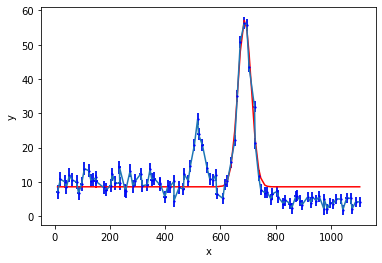

In [453]:
#fit spectrum to fit function
#create gaussian again
def gauss(x, amp1, xcen, sigma, bkgrd):
    return amp1*np.exp((-0.5)*(((x-xcen)/sigma)**2))+bkgrd
    
#optimize
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(gauss, x_data, y_data, p0=[60, 700, 60, 15])

#variance
perr_gauss = np.sqrt(np.diag(pcov_gauss))
#plot best fit superimposed onto spectrum data

plt.figure()
plt.plot(x_data, gauss(x_data,*popt_gauss), 'r-', label = 'fit')
plt.errorbar(df['x'], df['y'], yerr = df['y_error'], xerr = df['x_error'])
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(x_data, y_data, xerr=xerr, yerr=yerr, markersize = 1.25, fmt = 'o', color='blue', label = 'spectrum')

print('amplitude = 80, ','amplitude fit = ', popt_gauss[0], '±', perr_gauss[0])
print('xcenter = 500, ','xcenter fit = ', popt_gauss[1], '±', perr_gauss[1])
print('sigma = 50, ','sigma fit = ', popt_gauss[2], '±', perr_gauss[2])
print('background fit= ', popt_gauss[3], '±', perr_gauss[3])


fit parameters for the sigma error are given:
-0.005908116263195684±0.0032869948762345716
14.531510623422571±2.26808538716766


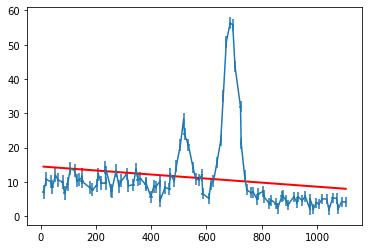

In [408]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.odr.odrpack import Model
#write a linear model function
def linear(A, x):
    return A[0]*x + A[1]

#fit model
lin_model = sp.odr.Model(linear)
data1 = sp.odr.RealData(x_data, y_data, sx = xerr, sy = yerr)

#initiate guess
lin_odr = sp.odr.ODR(data1, lin_model, beta0=[0.5,10])
lin_out = lin_odr.run()
popt_lin = lin_out.beta
perr_lin = lin_out.sd_beta

fit = linear(popt_lin, x_data)

plt.plot()
plt.errorbar(df['x'], df['y'], yerr = df['y_error'], xerr = df['x_error'])
plt.plot(x_data, fit, 'r', lw=2, label='best fit curve', zorder=2)

popt_lin = lin_out.beta
perr_lin = lin_out.sd_beta
print('fit parameters for the sigma error are given:')
for i in range(len(popt_lin)):
    print(str(popt_lin[i])+ '±'+str(perr_lin[i]))

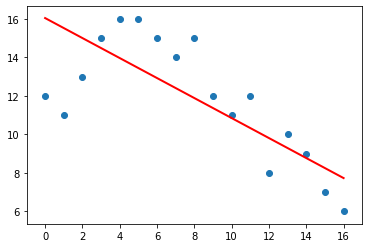

In [445]:

def linear(A, x):
    return A[0]*x + A[1]

lin_model = sp.odr.Model(linear)
data1 = sp.odr.RealData(x,y)

lin_odr = sp.odr.ODR(data1, lin_model, beta0=[0.5,10])
lin_out = lin_odr.run()
popt_lin = lin_out.beta
perr_lin = lin_out.sd_beta

fit = linear(popt_lin, x)
plt.plot(x, fit, 'r', lw=2, label= '', zorder = 2)
plt.scatter(x,y,label = 'data')

